In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score,recall_score,precision_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("data/weatherAUS.csv")
print(df.shape)
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Exploratory Data Analysis

## 1. Find number of catergorical columns and numerical columns

In [ ]:
# find number of catergorical columns and numerical columns

categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical columns: ",categorical_columns)
print("Numerical columns: ",numerical_columns)
print()
print("Number of categorical columns: ",len(categorical_columns))
print("Number of numerical columns: ",len(numerical_columns))

Categorical columns:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Number of categorical columns:  7
Number of numerical columns:  16


## 2. Identify the percentage of missing values ​​in both categorical and numerical features

In [ ]:
# ratio of missing values in each column
number = df.isna().sum()
ratio = df.isna().sum()/df.shape[0]
# print column name and ratio
for i,j,k in zip(ratio.index,ratio,number):
    print(f"Column : {i} Ratio : {j} No of Nulls : {k} Total number of values : {len(df[i])}")

Column : Date Ratio : 0.0 No of Nulls : 0 Total number of values : 145460
Column : Location Ratio : 0.0 No of Nulls : 0 Total number of values : 145460
Column : MinTemp Ratio : 0.010208992162793895 No of Nulls : 1485 Total number of values : 145460
Column : MaxTemp Ratio : 0.008669049910628352 No of Nulls : 1261 Total number of values : 145460
Column : Rainfall Ratio : 0.022418534304963565 No of Nulls : 3261 Total number of values : 145460
Column : Evaporation Ratio : 0.43166506256015397 No of Nulls : 62790 Total number of values : 145460
Column : Sunshine Ratio : 0.48009762133919975 No of Nulls : 69835 Total number of values : 145460
Column : WindGustDir Ratio : 0.0709885879279527 No of Nulls : 10326 Total number of values : 145460
Column : WindGustSpeed Ratio : 0.07055547916953114 No of Nulls : 10263 Total number of values : 145460
Column : WindDir9am Ratio : 0.07263852605527293 No of Nulls : 10566 Total number of values : 145460
Column : WindDir3pm Ratio : 0.02906641000962464 No of 

## 3. Handle missing values in categorical and numerical features

In [ ]:
# print columns with more than 40% missing values
for i,j in zip(ratio.index,ratio):
    if j>=0.4:
        print(i)

# remove columns with more than 50% missing values
df_new = df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1)
print(df_new.shape)
categorical_columns = [col for col in df_new.columns if df_new[col].dtype == 'object']
numerical_columns = [col for col in df_new.columns if df_new[col].dtype != 'object']

Evaporation
Sunshine
Cloud3pm
(145460, 19)


In [ ]:
#fill mode for catergorical columns and mean for numerical columns
for i in categorical_columns:
    df_new[i].fillna(df_new[i].mode()[0],inplace=True)
for i in numerical_columns:
    df_new[i].fillna(df_new[i].mean(),inplace=True)

# check if there are any missing values
df_new.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Identify which of the numerical features contains outliers and visualize it using Boxplots

12

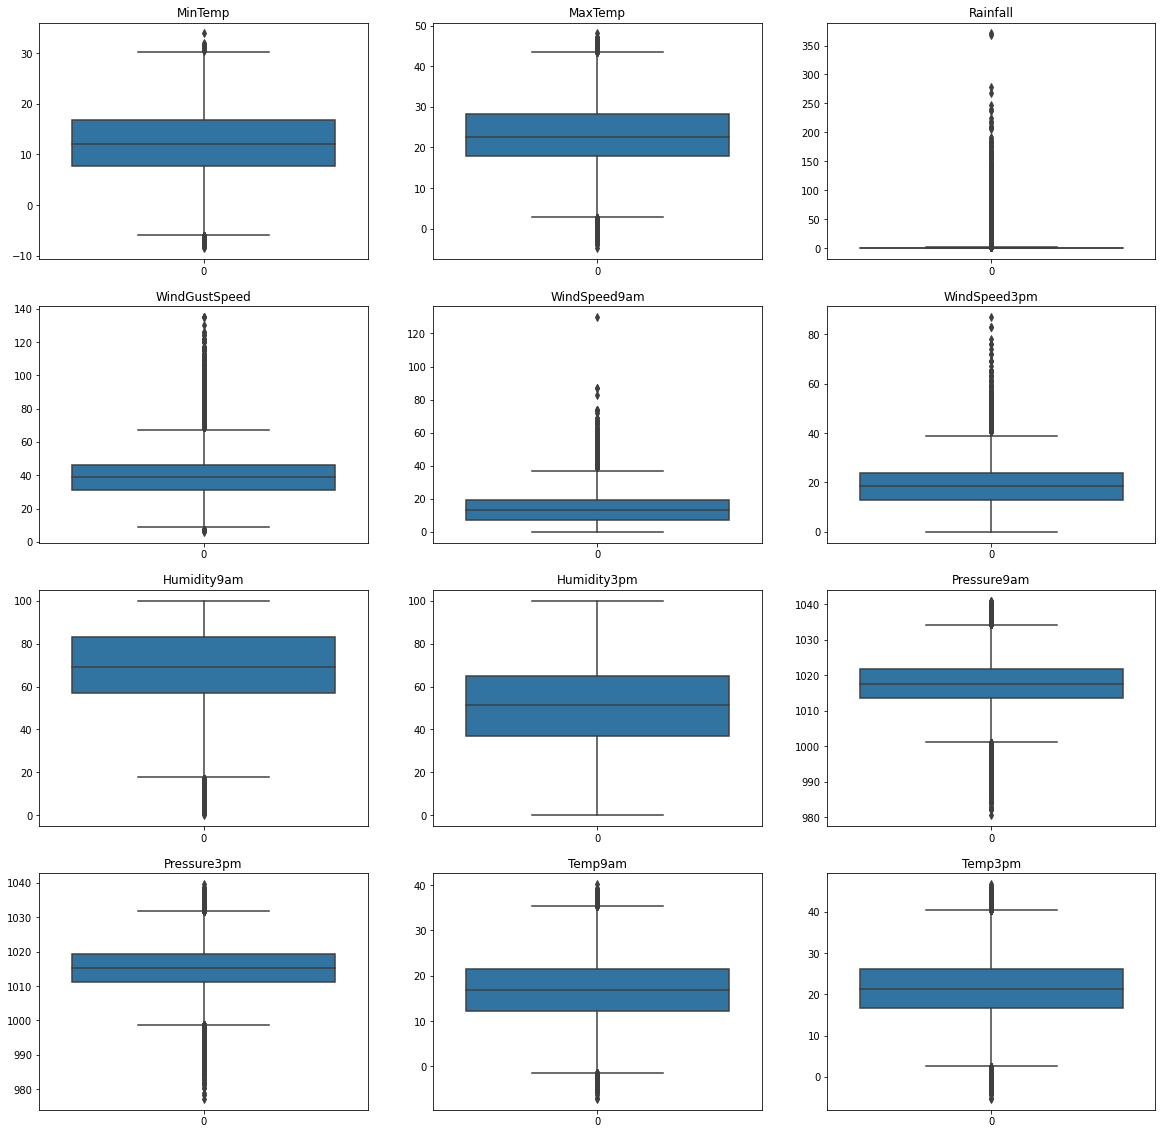

In [ ]:
#use subplots and plot boxplot for numerical columns with column names in x axis
fig,ax = plt.subplots(4,3,figsize=(20,20))
for i,j in zip(numerical_columns,ax.flatten()):
    sns.boxplot(df_new[i],ax=j)
    j.set_title(i)
len(numerical_columns)

## Handle the outliers

In [ ]:
# Using interquartile range to find outliers and remove them
for col in numerical_columns:
    q1 = df_new[col].quantile(0.25)
    q3 = df_new[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    df_new = df_new[(df_new[col]>lower_bound) & (df_new[col]<upper_bound)]
print(df_new.shape)

(109828, 19)


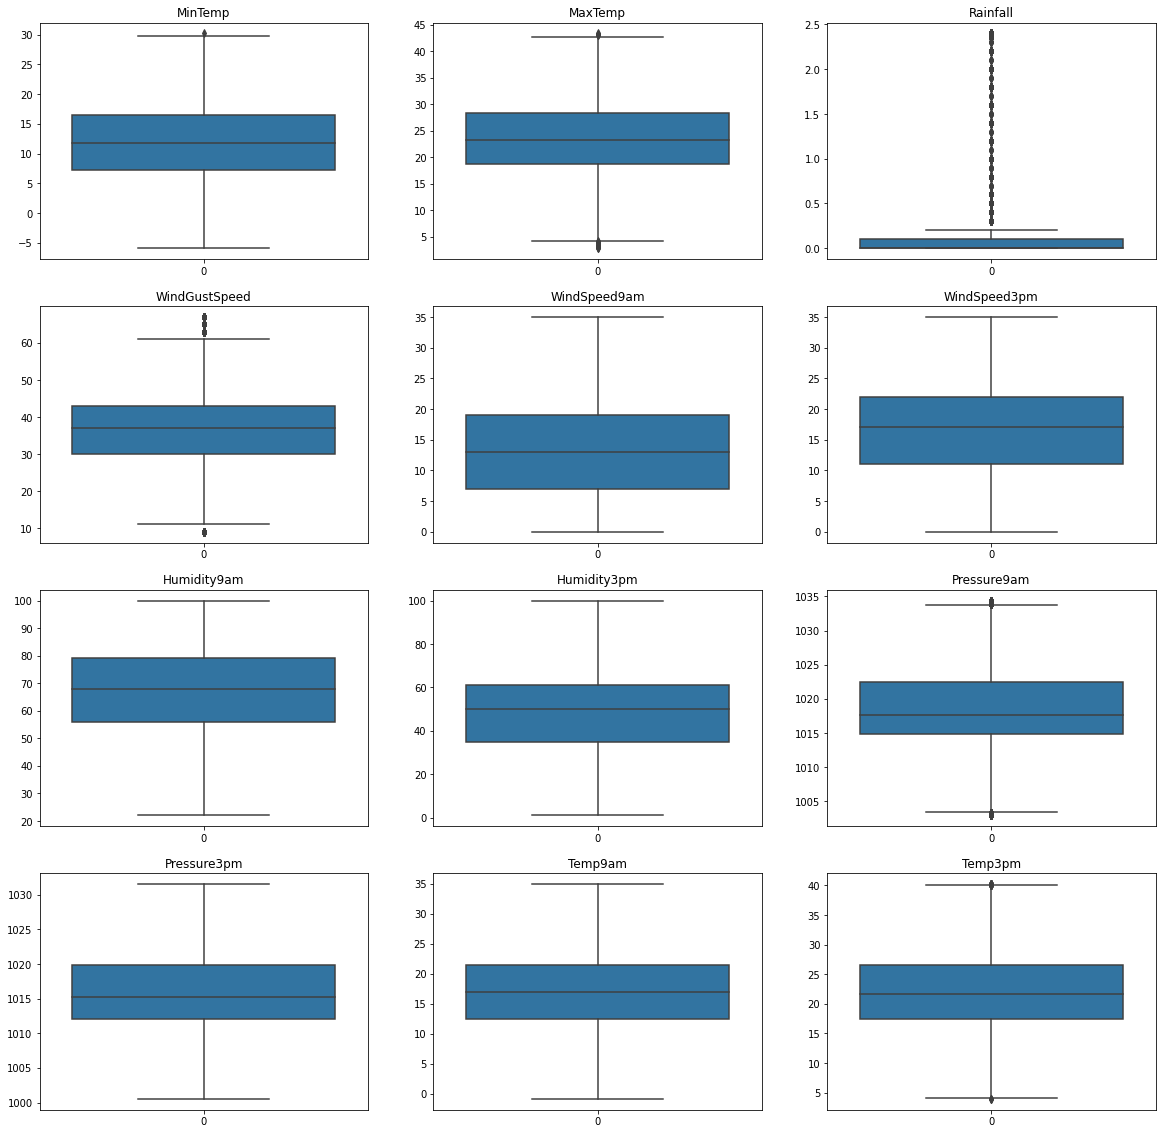

In [ ]:
# ploting box plot again
fig,ax = plt.subplots(4,3,figsize=(20,20))
for i,j in zip(numerical_columns,ax.flatten()):
    sns.boxplot(df_new[i],ax=j)
    j.set_title(i)



# Classification model training and result analysis

In [ ]:
# creating logistic regression model and naive bayes model
# Display the Classification error, Precision, Recall , F1 score and  Specificity scores for the model
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder

In [ ]:
#split the dataset into train and test
X = df_new.drop(['RainTomorrow','Date'],axis=1)
# get dummies for categorical columns
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']
X = pd.get_dummies(X,columns=categorical_columns)
y = df_new['RainTomorrow']
label = LabelEncoder()
y = label.fit_transform(y)

ndf = X.copy()
ndf['RainTomorrow'] = y
ndf.to_csv('data/processeddata.csv',index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
91177,7.7,24.0,0.0,31.0,11.0,17.0,63.0,41.0,1023.10000,1019.600000,...,0,0,0,0,0,0,0,0,1,0
125903,12.6,26.3,0.6,43.0,15.0,13.0,74.0,37.0,1017.64994,1015.255889,...,0,0,1,0,0,0,0,0,1,0
92617,7.9,22.6,0.0,28.0,7.0,20.0,48.0,52.0,1019.40000,1015.400000,...,0,0,0,0,0,0,0,0,1,0
76772,8.9,20.9,0.0,41.0,11.0,26.0,99.0,65.0,1010.70000,1009.900000,...,0,0,0,0,0,1,0,0,1,0
42225,6.0,18.0,0.2,26.0,13.0,13.0,82.0,53.0,1026.20000,1023.300000,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confustion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

In [ ]:
def l_regression(X_train, X_test, y_train, y_test):
    model =LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Logistic regression recall: ", recall_score(y_test, y_pred))
    print("Logistic regression precision: ", precision_score(y_test, y_pred))
    #f1 score
    print("Logistic regression F1 score: ", f1_score(y_test, y_pred))
    #classification error
    print("Logistic regression Classification error: ", 1 - accuracy_score(y_test, y_pred))
    #spedificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    print("Logistic regression Specificity: ", specificity)
    print("Logistic regression AUC: ", roc_auc_score(y_test, y_pred))
    print("Logistic regression Accuracy: ", accuracy_score(y_test, y_pred))
    plot_confustion_matrix(y_test,y_pred)

    return model

def naive_bayes(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Naive Bayes recall: ", recall_score(y_test, y_pred))
    print("Naive Bayes precision: ", precision_score(y_test, y_pred))
    #f1 score
    print("Naive Bayes F1 score: ", f1_score(y_test, y_pred))
    #classification error
    print("Naive Bayes Classification error: ", 1 - accuracy_score(y_test, y_pred))
    #spedificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    print("Naive Bayes Specificity: ", specificity)
    print("Logistic regression AUC: ", roc_auc_score(y_test, y_pred))
    print("Logistic regression Accuracy: ", accuracy_score(y_test, y_pred))
    plot_confustion_matrix(y_test,y_pred)

    return model


Logistic regression recall:  0.2634976525821596
Logistic regression precision:  0.6676579925650558
Logistic regression F1 score:  0.37786661056175047
Logistic regression Classification error:  0.13461713557315846
Logistic regression Specificity:  0.9759133527319754
Logistic regression AUC:  0.6197055026570675
Logistic regression Accuracy:  0.8653828644268415


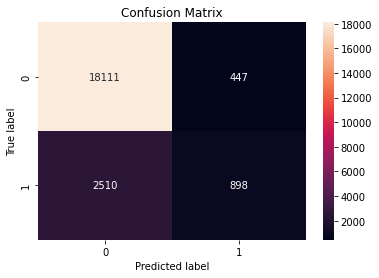

In [ ]:
#Lab note
lmodel=l_regression(X_train, X_test, y_train, y_test)

### Inference from logistic regression

We can see that its recall is low which means that it is not able to predict the positive class well. This may be because the data is imbalanced.

In [ ]:
# ratio of 0 and 1 in y
ypd=pd.DataFrame(y)
ypd.value_counts()/len(y)

0    0.844193
1    0.155807
dtype: float64

We can see that the number of positive class is very less as compared to the negative class. So, we can use SMOTE to balance the data.

In [ ]:
#use smote to balance the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, ypd)
print(y_res.value_counts()/len(y_res))
X_res.shape

0    0.5
1    0.5
dtype: float64


(185432, 111)

Logistic regression recall:  0.7382111183214363
Logistic regression precision:  0.7633506682323995
Logistic regression F1 score:  0.7505704467353952
Logistic regression Classification error:  0.24464097931889883
Logistic regression Specificity:  0.7724119386931971


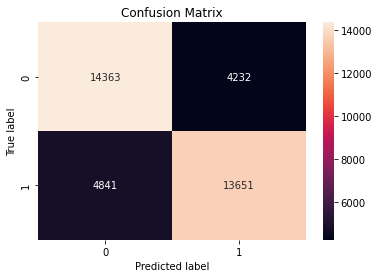

In [ ]:
#split the dataset into train and test
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

lmodel=l_regression(Xl_train, Xl_test, yl_train, yl_test)

Now we can see that the recall has increased to 0.73 which is a good improvement. But its specificity becomes very low which means that it is not able to predict the negative class well.

Naive Bayes recall:  0.641725352112676
Naive Bayes precision:  0.22847889678228164
Naive Bayes F1 score:  0.336979969183359
Naive Bayes Classification error:  0.39178730765728853
Naive Bayes Specificity:  0.6020584114667529
Logistic regression AUC:  0.6218918817897144
Logistic regression Accuracy:  0.6082126923427115


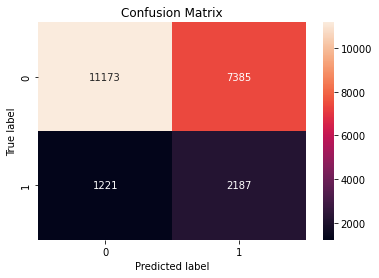

In [ ]:
#lab note
nbmodel=naive_bayes(X_train, X_test, y_train, y_test)

### Inference from Naive Bayes

We can see that its precision is low which means that it is not able to predict the positive class well. This may be because the data is imbalanced.

Naive Bayes recall:  0.7870430456413584
Naive Bayes precision:  0.9437167682531449
Naive Bayes F1 score:  0.8582886123724714
Naive Bayes Classification error:  0.12958718688489224
Naive Bayes Specificity:  0.9533207851573003


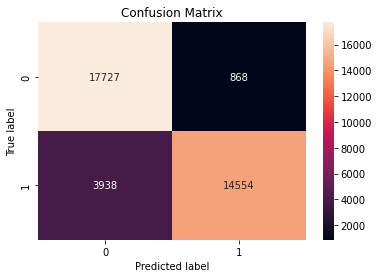

In [ ]:
#trying it with balanced dataset
nbmodel=naive_bayes(Xl_train, Xl_test, yl_train, yl_test)

We can see a good improvement in the evauluation metrics after using SMOTE.

### Manually trying Naive Bayes without using library

In [ ]:
# hard code the naive bayes model

#lets take a sample row from the dataset
sampledata = X_test.iloc[0]

#lets predict the value for the sample data
dfnaive = pd.DataFrame()
dfnaive[X.columns] = X
dfnaive['RainTomorrow'] = y

0.45263982377796974


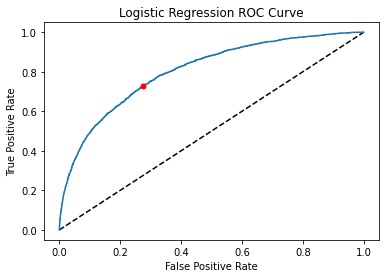

In [ ]:
# adjust the threshold for logistic regression model using ROC and AUC
y_pred_prob = lmodel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)
#mark the optimal threshold on the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr[optimal_idx], tpr[optimal_idx], marker='o', markersize=5, color="red")

plt.show()

# find optimal threshold

Logistic regression recall:  0.7291666666666666
Logistic regression precision:  0.3282694848084544
Logistic regression F1 score:  0.4527236290763345
Logistic regression Classification error:  0.2735136119457343
Logistic regression Specificity:  0.7259941804073715


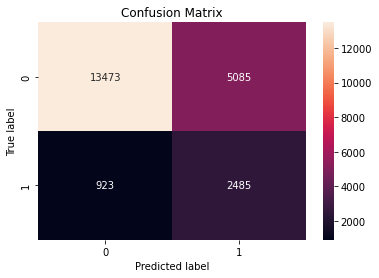

In [ ]:
# predict with optimal threshold
y_pred = np.where(lmodel.predict_proba(X_test)[:,1] > optimal_threshold, 1, 0)
print("Logistic regression recall: ", recall_score(y_test, y_pred))
print("Logistic regression precision: ", precision_score(y_test, y_pred))
#f1 score
print("Logistic regression F1 score: ", f1_score(y_test, y_pred))
#classification error
print("Logistic regression Classification error: ", 1 - accuracy_score(y_test, y_pred))
#spedificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Logistic regression Specificity: ", specificity)
plot_confustion_matrix(y_test,y_pred)


We couldnt find any improvement in the evaluation metrics after using optimal threshold

In [ ]:
#kfold cross validation for logistic regression and naive bayes
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#kfold cross validation for logistic regression
kfold = KFold(n_splits=10)
lmodelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(lmodelCV, X_res, y_res, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.700


In [ ]:
# kfold cross validation for naive bayes
kfold = KFold(n_splits=10)
nbmodelCV = GaussianNB()
scoring = 'accuracy'
results = cross_val_score(nbmodelCV, X_res, y_res, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


10-fold cross validation average accuracy: 0.515


In [ ]:
# optimize the model using grid search
from sklearn.model_selection import GridSearchCV

# logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
grid.fit(Xl_train, yl_train)

# print best parameter after tuning
print(grid.best_params_)

print(grid.best_estimator_)

y_pred = grid.predict(Xl_test)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.763 total time=   4.2s
[CV 2/5] END ...........................C=0.001;, score=0.753 total time=   4.6s
[CV 3/5] END ...........................C=0.001;, score=0.754 total time=   4.7s
[CV 4/5] END ...........................C=0.001;, score=0.757 total time=   6.0s
[CV 5/5] END ...........................C=0.001;, score=0.747 total time=   5.3s
[CV 1/5] END ............................C=0.01;, score=0.777 total time=   4.7s
[CV 2/5] END ............................C=0.01;, score=0.747 total time=   5.0s
[CV 3/5] END ............................C=0.01;, score=0.756 total time=   5.3s
[CV 4/5] END ............................C=0.01;, score=0.757 total time=   4.8s
[CV 5/5] END ............................C=0.01;, score=0.745 total time=   4.4s
[CV 1/5] END .............................C=0.1;, score=0.764 total time=   4.1s
[CV 2/5] END .............................C=0.1;,

In [ ]:
print("Logistic regression recall: ", recall_score(yl_test, y_pred))
print("Logistic regression precision: ", precision_score(yl_test, y_pred))
#f1 score
print("Logistic regression F1 score: ", f1_score(yl_test, y_pred))
print("Logistic regression Classification error: ", 1 - accuracy_score(yl_test, y_pred))
#specificity
tn, fp, fn, tp = confusion_matrix(yl_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", specificity)
print("ROC AUC score: ", roc_auc_score(yl_test, y_pred))
# print("Recall", recall_score(yl_test, y_pred))

Logistic regression recall:  0.7285312567596799
Logistic regression precision:  0.7595850248082995
Logistic regression F1 score:  0.7437341282985537
Logistic regression Classification error:  0.25033030441933835
Logistic regression Specificity:  0.7706910459801022
ROC AUC score:  0.7496111513698911
Recall 0.7285312567596799


In [ ]:
# naive bayes grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3)
grid.fit(Xl_train, yl_train)

# print best parameter after tuning
print(grid.best_params_)

y_pred = grid.predict(Xl_test)
print("Naive Bayes recall: ", recall_score(yl_test, y_pred))
print("Naive Bayes precision: ", precision_score(yl_test, y_pred))
#f1 score
print("Naive Bayes F1 score: ", f1_score(yl_test, y_pred))
print("Naive Bayes Classification error: ", 1 - accuracy_score(yl_test, y_pred))
#specificity
tn, fp, fn, tp = confusion_matrix(yl_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Naive Bayes Specificity: ", specificity)
print("Logistic regression Specificity: ", specificity)
print("ROC AUC score: ", roc_auc_score(yl_test, y_pred))
print("Recall", recall_score(yl_test, y_pred))

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.869 total time=   0.4s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.868 total time=   0.6s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.867 total time=   0.4s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.867 total time=   0.4s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.868 total time=   0.4s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.869 total time=   0.4s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.868 total time=   0.4s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.867 total time=   0.5s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.867 total time=   0.5s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.868 total time=   0.3s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.869 total time=   0.4s
[CV 2/5] END ...............var_smoothing=1e-07;

In [ ]:
print("Naive Bayes recall: ", recall_score(yl_test, y_pred))
print("Naive Bayes precision: ", precision_score(yl_test, y_pred))
#f1 score
print("Naive Bayes F1 score: ", f1_score(yl_test, y_pred))
print("Naive Bayes Classification error: ", 1 - accuracy_score(yl_test, y_pred))
#specificity
tn, fp, fn, tp = confusion_matrix(yl_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("Naive Bayes Specificity: ", specificity)
print("Logistic regression Specificity: ", specificity)
print("ROC AUC score: ", roc_auc_score(yl_test, y_pred))
print("Recall", recall_score(yl_test, y_pred))

Naive Bayes recall:  0.8291693705386113
Naive Bayes precision:  0.9233965672990063
Naive Bayes F1 score:  0.873749893153261
Naive Bayes Classification error:  0.11947582710922966
Naive Bayes Specificity:  0.931594514654477
Logistic regression Specificity:  0.931594514654477
ROC AUC score:  0.8803819425965441
Recall 0.8291693705386113


## Logisitic Regression vs Naive Bayes

### Metrics of Least classification error

|Metrics|Logistic Regression|Naive Bayes|
|:-|:-|:-|
|Precision|0.67|0.92|
|Specificity|0.97|0.77|
|F1 score|0.377|0.87|
|Classification error|0.13|0.12|

We can see that Naive Bayes is performing better than Logistic Regression.
